# Crawling data berita

In [1]:
!pip install Sastrawi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import warnings
import pandas as pd
import numpy as np
import nltk
import re
import csv

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
import requests
from bs4 import BeautifulSoup
import nltk
import pandas as pd

# Unduh konten halaman web berita
url = "https://radarjatim.id/festival-film-pendek-layar-lokal-diserbu-ratusan-pelajar-sma-dan-smk/"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div', class_="content-inner")  # Sesuaikan dengan struktur HTML halaman web berita

# Periksa apakah elemen article ada sebelum mencoba mengambil teksnya
if article is not None:
    article_text = article.get_text()

    # Tokenisasi teks menjadi kalimat menggunakan nltk
    nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
    sentences = nltk.sent_tokenize(article_text)

    # Cetak kalimat-kalimat
    for sentence in sentences:
        print(sentence)
else:
    print("Elemen berita tidak ditemukan")


SIDOARJO (RadarJatim.id) — Komunitas-komunitas film pendek yang ada di Sidoarjo terus bergerak, mensosialisasikan keberadaan film pendek yang berkembang membaik.
Kali ini bertemakan ‘Keanekaragaman Lokalitas dan Budaya’ pada tanggal 28-29 Oktober 2023 di Gedung Dewan Kesenian Sidoarjo.
Festival yang memutar film ‘Layar Lokal’ mengangkat kearifan lokal dari berbagai wilayah di Indonesia tersebut, tak diduga diserbu oleh para remaja, rata-rata pelajar SMA, SMK Sidoarjo, Surabaya dan sekitarnya.
Sehingga panitia pun harus menambahkan kursi untuk penonton.
Ketua Asfis (Asosiasi Sineas Film Sidoarjo) Rehal Lahir Prias Sumputari mengatakan kalau kegiatannya mempunyai tiga program utama, yaitu pelatihan, workshop dan pemutaran film.
Juga membantu teman-teman komunitas film yang ada di Sidoarjo, khususnya untuk mendistribusikan karya-karyanya ke berbagai festival.
“Karena kebanyakan teman-teman saat ini kendalanya adalah bagaimana film ini setelah syuting.
Itu mau dikemanakan, teman-teman mas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Preprocessing
# Lowercasing
article_text = article_text.lower()

# Cleaning
article_text = ''.join(e for e in article_text if (e.isalnum() or e.isspace() or e == '.'))

# Hapus Angka
article_text = ''.join([char for char in article_text if not char.isdigit()])

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')
sentences = nltk.sent_tokenize(article_text)

# Tokenisasi setiap kalimat menjadi kata-kata
words = [nltk.word_tokenize(sentence) for sentence in sentences]




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
#custome stopword

from nltk.corpus import stopwords

# Mengambil daftar stopword bahasa Indonesia dari NLTK
stopwords_indonesia = set(stopwords.words("indonesian"))

# Sekarang, Anda memiliki daftar stopword yang telah diperbarui
print(stopwords_indonesia)

{'pada', 'menunjukkan', 'bawah', 'dimaksud', 'sebesar', 'jelaslah', 'segalanya', 'tetapi', 'diungkapkan', 'tiap', 'pun', 'waduh', 'dimaksudkannya', 'tersampaikan', 'memberikan', 'diibaratkannya', 'begini', 'sini', 'besar', 'memisalkan', 'terlihat', 'tak', 'nyatanya', 'cukuplah', 'menyampaikan', 'terdahulu', 'seperti', 'itulah', 'dikarenakan', 'masalahnya', 'percuma', 'lain', 'tentunya', 'menantikan', 'berapapun', 'cara', 'ditunjuki', 'atau', 'bertanya', 'mengetahui', 'sebelumnya', 'tertentu', 'tidak', 'semisalnya', 'turut', 'dipersoalkan', 'sekurang-kurangnya', 'melihatnya', 'rupanya', 'bertanya-tanya', 'jadi', 'sesuatunya', 'lalu', 'satu', 'semua', 'beberapa', 'diketahuinya', 'sepihak', 'bersama', 'berarti', 'kamu', 'kebetulan', 'para', 'bagaimanapun', 'berkenaan', 'dikatakan', 'inginkan', 'sampai', 'menanya', 'perlu', 'akulah', 'selama', 'tiba', 'bung', 'berakhirlah', 'belum', 'dulu', 'berapalah', 'didapat', 'keinginan', 'ke', 'hanyalah', 'ingat-ingat', 'merupakan', 'pula', 'kitalah'

In [9]:
# Stopword Removal
stop_words = set(stopwords.words('indonesian'))
filtered_sentences = []


for sentence in words:
    filtered_sentence = [word for word in sentence if word.lower() not in stop_words]
    filtered_sentences.append(filtered_sentence)


# Cetak kalimat-kalimat yang telah diproses
for filtered_sentence in filtered_sentences:
    print(filtered_sentence)

# Tutup respons setelah digunakan
response.close()

['sidoarjo', 'radarjatim.id', 'komunitaskomunitas', 'film', 'pendek', 'sidoarjo', 'bergerak', 'mensosialisasikan', 'keberadaan', 'film', 'pendek', 'berkembang', 'membaik', '.']
['kali', 'bertemakan', 'keanekaragaman', 'lokalitas', 'budaya', 'tanggal', 'oktober', 'gedung', 'dewan', 'kesenian', 'sidoarjo', '.']
['festival', 'memutar', 'film', 'layar', 'lokal', 'mengangkat', 'kearifan', 'lokal', 'wilayah', 'indonesia', 'diduga', 'diserbu', 'remaja', 'ratarata', 'pelajar', 'sma', 'smk', 'sidoarjo', 'surabaya', '.']
['panitia', 'kursi', 'penonton', '.']
['ketua', 'asfis', 'asosiasi', 'sineas', 'film', 'sidoarjo', 'rehal', 'lahir', 'prias', 'sumputari', 'kegiatannya', 'program', 'utama', 'pelatihan', 'workshop', 'pemutaran', 'film', '.']
['membantu', 'temanteman', 'komunitas', 'film', 'sidoarjo', 'mendistribusikan', 'karyakaryanya', 'festival', '.']
['kebanyakan', 'temanteman', 'kendalanya', 'film', 'syuting', '.']
['dikemanakan', 'temanteman', 'bingung', 'disiapkan', '.']
['tugas', 'bersama

In [33]:
pip install tabulate


In [45]:
from tabulate import tabulate
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming filtered_sentences is a list of sentences after stopword removal

# Join the filtered sentences into a list of strings
corpus = [' '.join(sentence) for sentence in filtered_sentences]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to get the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a Pandas DataFrame for better visualization
df = pd.DataFrame(data=tfidf_matrix.toarray(), columns=feature_names)

# Add a column for the sentences
df.insert(0, 'Kalimat', [' '.join(sentence) for sentence in filtered_sentences])

# Add a column for the sentence numbers
df.insert(0, 'No', range(1, len(filtered_sentences) + 1))

# Add a column for the count of terms in each sentence
df['Term Count'] = df.drop(['Kalimat', 'No'], axis=1).gt(0).sum(axis=1)

# Set the display options for Pandas to show all columns without truncation
pd.set_option("display.max_columns", None)

# Print the DataFrame in a tabular format with borders
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)
print(table)


╒══════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════╤═════════════════╤═════════╤═══════════════════════════════════════════════╤════════════╤══════════╤═══════════╤═════════════╤════════════╤════════════════╤════════════╤═══════════════╤══════════════╤═══════════════╤════════════╤══════════════╤═══════════╤═══════════╤══════════╤══════════╤════════════════╤══════════╤══════════╤═══════════════╤═══════════╤═════════════╤════════════╤══════════╤═══════════╤══════════════╤════════════╤══════════╤════════════╤═══════════════╤═════════════╤════════════════╤═════════╤══════════╤══════════╤══════════╤══════════╤══════════╤══════════════╤═════════════╤═════════════╤════════════╤══════════╤══════════╤══════════╤══════════╤═════════════════╤══════════════════╤════════════╤══════════════╤══════════════╤═══════════════╤══════════════╤════════════╤═════════╤═════════════╤═══════════════

In [42]:
len(feature_names)

130


Cosine similarity (similaritas kosinus) adalah metode untuk mengukur sejauh mana dua vektor arah berada dalam hubungan linear satu sama lain. Metode ini sering digunakan dalam pemrosesan bahasa alami dan pengelompokan data. Ketika diterapkan pada representasi vektor dari dokumen atau teks, cosine similarity memberikan ukuran sejauh mana dua dokumen memiliki arah yang mirip di dalam ruang vektor.


Rumus :
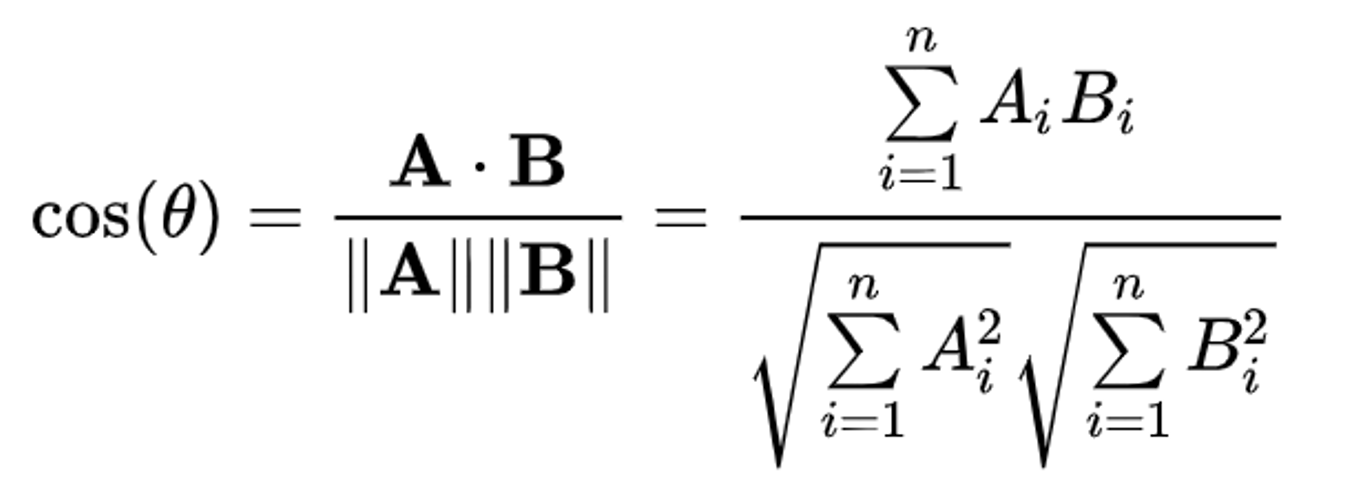


In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0655


In [49]:
# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.0655
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.0796
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.1082
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.1341
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0561
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0506
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.1075
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0361
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0298
Cosine Similarity antara Kalimat 1 dan Kalimat 13: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 14: 0.0455
Cosine Similarity antara Kalimat 1 dan Kalimat 15: 0.0369
Cosine Similarity antara Kalimat 1 dan Kalimat 16: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 17: 0.1443
Cosine Similarity antara Kalimat 1 dan Kalimat 18: 0.0000
Cosine Similarity anta

In [50]:
import pandas as pd

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16,Kalimat 17,Kalimat 18,Kalimat 19,Kalimat 20
Kalimat 1,1.0000,0.0655,0.0796,0.0,0.1082,0.1341,0.0561,0.0000,0.0506,0.1075,0.0361,0.0298,0.0000,0.0455,0.0369,0.0000,0.1443,0.0000,0.0000,0.0566
Kalimat 2,0.0655,1.0000,0.0313,0.0,0.0320,0.0528,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1687,0.0000,0.0000,0.0000
Kalimat 3,0.0796,0.0313,1.0000,0.0,0.0518,0.1071,0.0269,0.0000,0.0243,0.0515,0.1682,0.1285,0.0000,0.0218,0.2069,0.0937,0.2985,0.0000,0.1293,0.0000
Kalimat 4,0.0000,0.0000,0.0000,1.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Kalimat 5,0.1082,0.0320,0.0518,0.0,1.0000,0.0872,0.0548,0.0000,0.0495,0.1615,0.0352,0.0292,0.0000,0.0445,0.0361,0.0000,0.0939,0.0000,0.0000,0.0451
Kalimat 6,0.1341,0.0528,0.1071,0.0,0.0872,1.0000,0.1501,0.1044,0.0408,0.0867,0.0875,0.1209,0.0000,0.0367,0.0298,0.1132,0.1940,0.0867,0.0000,0.0000
Kalimat 7,0.0561,0.0000,0.0269,0.0,0.0548,0.1501,1.0000,0.1315,0.0515,0.1092,0.0366,0.1505,0.0000,0.0462,0.0375,0.0764,0.0487,0.1093,0.0000,0.0000
Kalimat 8,0.0000,0.0000,0.0000,0.0,0.0000,0.1044,0.1315,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0760,0.0000,0.1088,0.0000,0.0000
Kalimat 9,0.0506,0.0000,0.0243,0.0,0.0495,0.0408,0.0515,0.0000,1.0000,0.0986,0.0331,0.0274,0.0000,0.0418,0.0339,0.0000,0.0439,0.0000,0.0000,0.0000
Kalimat 10,0.1075,0.0000,0.0515,0.0,0.1615,0.0867,0.1092,0.0000,0.0986,1.0000,0.0702,0.0581,0.0000,0.0886,0.0719,0.0000,0.0933,0.0000,0.0000,0.0599


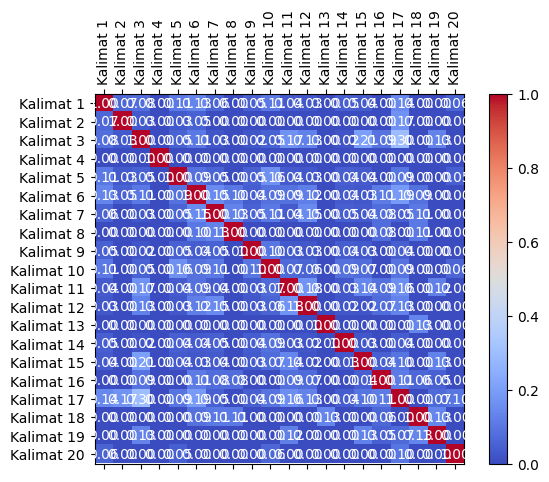

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

closeness centrality


Closeness centrality adalah salah satu metrik dalam analisis jaringan yang mengukur seberapa dekat suatu simpul (node) dengan simpul-simpul lain dalam jaringan tersebut. Suatu simpul dianggap "sentral" jika jaraknya ke simpul-simpul lain relatif lebih pendek dibandingkan dengan simpul-simpul lainnya. Closeness centrality didefinisikan sebagai kebalikan dari total jarak dari simpul tersebut ke semua simpul lain dalam jaringan.

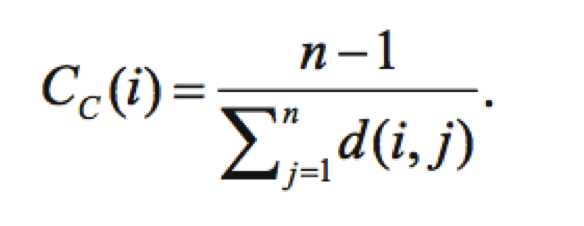

In [52]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
sidoarjo radarjatim.id  komunitaskomunitas film pendek yang ada di sidoarjo terus bergerak mensosialisasikan keberadaan film pendek yang berkembang membaik.: 11.1557
Closeness Centrality of kali ini bertemakan keanekaragaman lokalitas dan budaya pada tanggal  oktober  di gedung dewan kesenian sidoarjo.: 10.4167
Closeness Centrality of festival yang memutar film layar lokal mengangkat kearifan lokal dari berbagai wilayah di indonesia tersebut tak diduga diserbu oleh para remaja ratarata pelajar sma smk sidoarjo surabaya dan sekitarnya.: 11.9402
Closeness Centrality of sehingga panitia pun harus menambahkan kursi untuk penonton.: 0.0000
Closeness Centrality of ketua asfis asosiasi sineas film sidoarjo rehal lahir prias sumputari mengatakan kalau kegiatannya mempunyai tiga program utama yaitu pelatihan workshop dan pemutaran film.: 11.7186
Closeness Centrality of juga membantu temanteman komunitas film yang ada di sidoarjo khususnya untuk mendistribusikan karyakar

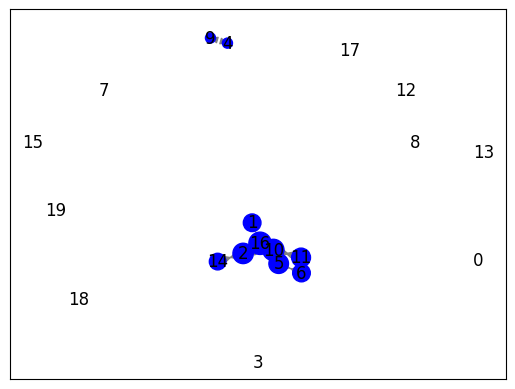

In [71]:
import networkx as nx

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0.15 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

In [68]:
# Cetak closeness centrality
print("Closeness Centrality:")
# for node, closeness in closeness_centrality.items():
#     print(f"Node {node}: {closeness:.4f}")
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
for node, closeness in sorted_closeness.items():
    print(f"Node {node}: {closeness:.4f}")

Closeness Centrality:
Node 5: 0.7751
Node 16: 0.7751
Node 6: 0.7414
Node 0: 0.6821
Node 4: 0.6821
Node 9: 0.6821
Node 10: 0.6821
Node 2: 0.6559
Node 14: 0.6559
Node 15: 0.6559
Node 8: 0.6090
Node 13: 0.5880
Node 11: 0.5684
Node 18: 0.5684
Node 17: 0.5501
Node 1: 0.5329
Node 7: 0.5167
Node 19: 0.4737
Node 12: 0.3553
Node 3: 0.0000


In [69]:
# Cetak closeness centrality
top_3_closeness = list(sorted_closeness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datacl = {
    "Node": [node for node, _ in top_3_closeness],
    "Closeness Centrality": [closeness for _, closeness in top_3_closeness],
    "Kalimat": [sentences[node] for node, _ in top_3_closeness]
}

df_top_3 = pd.DataFrame(datacl)

# Cetak DataFrame
print("Tiga Node Closeness Teratas")
df_top_3

Tiga Node Closeness Teratas


,Node,Closeness Centrality,Kalimat
0,5,0.7751,juga membantu temanteman komunitas film yang a...
1,16,0.7751,kita bisa belajar tentang kearifan lokal maupu...
2,6,0.7414,karena kebanyakan temanteman saat ini kendalan...


In [70]:
# Hitung PageRank
pagerank = nx.pagerank(G)

# Cetak PageRank dalam urutan dari terbesar ke terkecil
print("PageRank :")
sorted_pagerank = dict(sorted(pagerank.items(), key=lambda item: item[1], reverse=True))
for node, rank in sorted_pagerank.items():
    print(f"Node {node}: {rank:.4f}")

PageRank :
Node 16: 0.0808
Node 5: 0.0777
Node 6: 0.0724
Node 0: 0.0655
Node 4: 0.0655
Node 9: 0.0652
Node 10: 0.0651
Node 2: 0.0609
Node 14: 0.0602
Node 15: 0.0588
Node 8: 0.0498
Node 17: 0.0460
Node 13: 0.0451
Node 11: 0.0408
Node 18: 0.0379
Node 1: 0.0311
Node 7: 0.0288
Node 19: 0.0263
Node 12: 0.0143
Node 3: 0.0078


In [56]:
# Cetak closeness centrality
top_3_pagerank = list(sorted_pagerank.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
datapg = {
    "Node": [node for node, _ in top_3_pagerank],
    "Pagerank": [rank for _, rank in top_3_pagerank],
    "Kalimat": [sentences[node] for node, _ in top_3_pagerank]
}

df_top_3pg = pd.DataFrame(datapg)

# Cetak DataFrame
print("Tiga Node Pagerank Teratas")
df_top_3pg

Tiga Node Pagerank Teratas


,Node,Pagerank,Kalimat
0,16,0.1473,kita bisa belajar tentang kearifan lokal maupu...
1,2,0.1139,festival yang memutar film layar lokal mengang...
2,10,0.1097,kemudian sekedar informasi juga layar lokal in...


In [63]:
import pandas as pd

# Hitung betweenness centrality
betweenness= nx.betweenness_centrality(G)

# Cetak DataFrame
print("DataFrame Betweenness Centrality:")
sorted_betweenness = dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))
for node, between in sorted_betweenness.items():
    print(f"Node {node}: {between:.4f}")

DataFrame Betweenness Centrality:
Node 16: 0.0585
Node 2: 0.0351
Node 10: 0.0292
Node 5: 0.0175
Node 11: 0.0117
Node 6: 0.0058
Node 0: 0.0000
Node 1: 0.0000
Node 3: 0.0000
Node 4: 0.0000
Node 7: 0.0000
Node 8: 0.0000
Node 9: 0.0000
Node 12: 0.0000
Node 13: 0.0000
Node 14: 0.0000
Node 15: 0.0000
Node 17: 0.0000
Node 18: 0.0000
Node 19: 0.0000


In [64]:
# Cetak closeness centrality
top_3_between = list(sorted_betweenness.items())[:3]

# Memasukkan 3 kalimat teratas dan informasi node ke dalam DataFrame
databw = {
    "Node": [node for node, _ in top_3_between],
    "Between": [between for _, between in top_3_between],
    "Kalimat": [sentences[node] for node, _ in top_3_between]
}

df_top_3bw = pd.DataFrame(databw)

# Cetak DataFrame
print("Tiga Node Between Teratas")
df_top_3bw

Tiga Node Between Teratas


,Node,Between,Kalimat
0,16,0.0585,kita bisa belajar tentang kearifan lokal maupu...
1,2,0.0351,festival yang memutar film layar lokal mengang...
2,10,0.0292,kemudian sekedar informasi juga layar lokal in...
